In [82]:
import numpy
from matplotlib import pyplot

%matplotlib inline

def velocity(rho_max,U_max, rho):
    U = U_max * (1 - rho / rho_max)
    return U
def flux(rho,U_max,rho_max):
    U = velocity(rho_max,U_max, rho)
    F = rho * U
    return F
def ftbs(rho_0,U_max, rho_max, dt,dx,nt = 30 ):
    rho_hist = [rho_0.copy()]
    rho = rho_0.copy()
    F = flux(rho,U_max,rho_max)
    for n in range (nt):
        rho[1:] = rho[1:] - dt/dx * (F[1:]-F[:-1])
        rho[0] = 0
        rho[-1] = 0
        rho_hist.append(rho.copy())
    return rho_hist
def ic(x, x_l = 2, rho_l = 10):
    rho_0 = numpy.zeros_like(x)
    mask = numpy.where(numpy.logical_and(x>=0 , x<=x_l))
    rho_0[mask] = rho_l * x[mask]/ x_l
    return rho_0

In [83]:
U_max = 1.0
rho_max = 10.0
nx = 81
L = 4
nt = 30
dx = L/ (nx-1)
dt = dx / U_max
x = numpy.linspace(0.0, L, num = nx)

In [84]:
x_l = 2.0
rho_l = 10.0

In [86]:
rho_0 = ic(x, x_l = 2, rho_l = 10)

In [89]:
rho_hist = ftbs(rho_0,U_max, rho_max, dt,dx,nt = 30)

In [107]:
def plot(n,x,rho_hist):
    pyplot.figure()
    pyplot.xlabel('x')
    pyplot.ylabel('p')
    pyplot.grid()
    pyplot.plot(x,rho_hist[n])
    pyplot.xlim(x[0],x[-1])
    pyplot.ylim(-0.5, 20)
    pyplot.show()

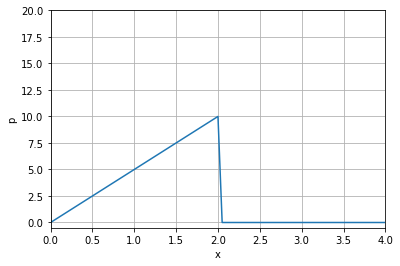

In [108]:
plot(0,x,rho_hist)

In [109]:
import ipywidgets

In [110]:
def interactive_plot(x,rho_hist):
    nt = len(rho_hist)
    nt_slider = ipywidgets.IntSlider(value = 0,  min = 0, max = nt,step=1, description = 'Time step')
    w = ipywidgets.interactive(plot,n=nt_slider, x = ipywidgets.fixed(x),rho_hist = ipywidgets.fixed(rho_hist))
    return w

interactive(children=(IntSlider(value=0, description='Time step', max=31), Output()), _dom_classes=('widget-in…

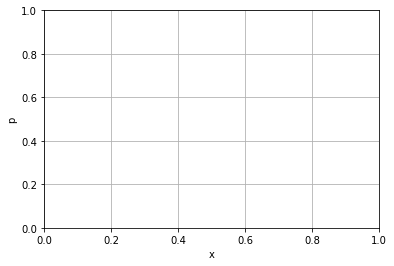

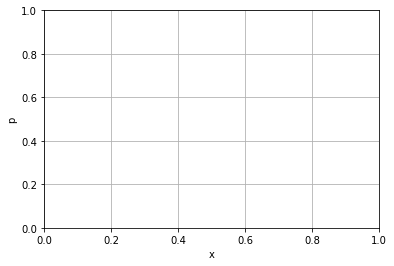

In [111]:
interactive_plot(x,rho_hist)